# Plot the domain

In [1]:
# Load the amrwind-frontend module
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/ascldap/users/lcheung/wind_uq/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import amrwind_frontend  as amrwind
import matplotlib.pyplot as plt
import numpy             as np
import math
import pandas as pd
import postproamrwindsample as ppsample
import time
import utm
from IPython.display import display, Markdown, Latex

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
precursordir  = '/ccs/home/lcheung/scratch.cfd162/AWAKEN/UnstableABL1_precursor2'
#'../precursor/UnstableABL1'
precursorsetup= precursordir+'/UnstableABL_precursor2.inp'
#precursorsetup= './UnstableABL_precursor2.inp'

cwd              = os.getcwd()
farmrundir       = '/ccs/home/lcheung/cfd162/lcheung/AWAKEN_summit_setup/UnstableABL_farmrun1/template'
#'/gpfs/alpine/cfd162/scratch/lcheung/AWAKEN/test/testOFfarmrun'
outputfile       = 'UnstableABL_farmrun1.inp'

In [3]:
os.chdir(farmrundir)
# Load the case
case = amrwind.MyApp.init_nogui()
case.loadAMRWindInput(outputfile)

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


OrderedDict([('amr.blocking_factor', '32'), ('amr.max_grid_size', '64')])

Text(0, 0.5, 'UTM Northing [m]')

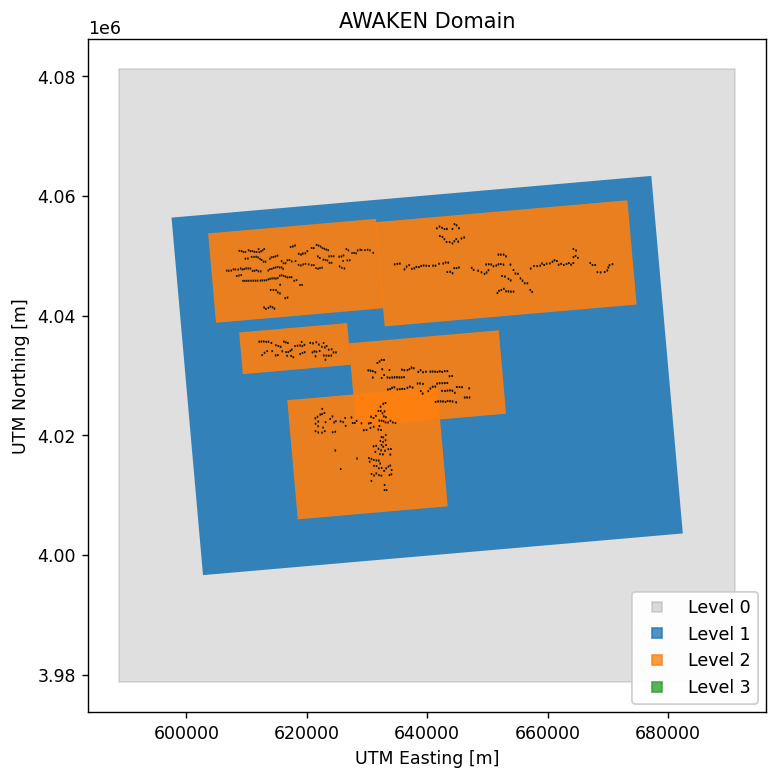

In [4]:
# Plot the domain
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] #['p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'#'YZ' 
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.plotDomain(ax=ax)
#ax.axis('auto')
#ax.axis([620000, 621000, 4020000, 4021000])
#ax.set_xlim([620000, 621000])
#ax.set_ylim([4020000, 4021000])

ax.set_aspect('auto')
ax.set_title('AWAKEN Domain')
ax.set_xlabel('UTM Easting [m]')
ax.set_ylabel('UTM Northing [m]')
#ax.set_xlim([640000,  650000])
#ax.set_ylim([4025000, 4035000])

(4024000.0, 4028000.0)

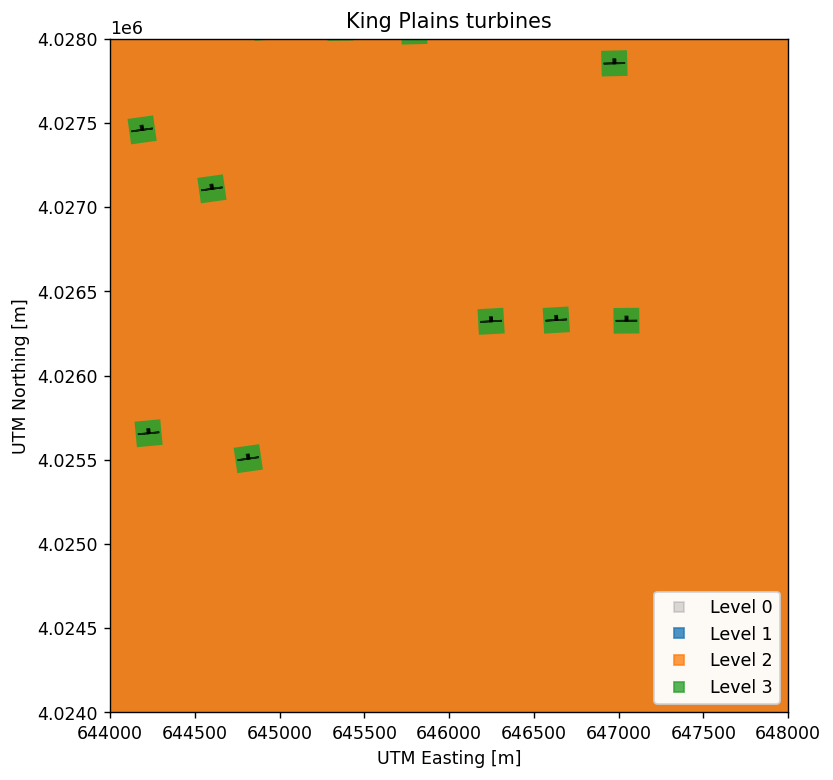

In [5]:
# Plot the domain
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = [] #['p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'#'YZ' 
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.plotDomain(ax=ax)
#ax.axis('auto')
#ax.axis([620000, 621000, 4020000, 4021000])
#ax.set_xlim([620000, 621000])
#ax.set_ylim([4020000, 4021000])

ax.set_aspect('auto')
ax.set_title('King Plains turbines')
ax.set_xlabel('UTM Easting [m]')
ax.set_ylabel('UTM Northing [m]')
ax.set_xlim([644000,  648000])
ax.set_ylim([4024000, 4028000])

In [6]:
def getdx(s):
    if s.startswith('farm_'): return 200.0
    if s.startswith('metmast_'): return 10.0
    return 20.0

def postprocessingkey(n, d1, d2):
    if ('outputprefix' in d2.outputdef):
        return n+'.'+d2.outputdef['AMR-Wind']
    else:
        return d1['outputprefix']['AMR-Wind']+'.'+n+'.'+d2.outputdef['AMR-Wind']
postprocessingdict= case.listboxpopupwindict['listboxpostprosetup'].dumpdict('AMR-Wind', keyfunc=postprocessingkey)

In [7]:
alloutput="""
|{filename:25}|{outfreq:8} (iter)|{outfreq:9} (sec)|{dx:10}|{variables:20}|
|{dashes:25}|{dashes:15}|{dashes:15}|{dashes:10}|{dashes:20}| 
""".format(filename="Filename", outfreq="freq.",variables="Variables", dx="dx",dashes="-----")
allfiles = postprocessingdict['incflo.post_processing'].split()
for file in allfiles:
    if postprocessingdict[file+'.type']==['Sampling']:
        filename=file+'XXXX.nc'
        dt=postprocessingdict[file+'.output_frequency']*0.1
        dx=getdx(file)
        line="|{filename:25}|{outfreq:15}|{dt:15.1f}|{dx:10.1f}|{variables:20}|\n".format(filename=filename, 
                                                                                          outfreq=postprocessingdict[file+'.output_frequency'], 
                                                                                 dt=dt,dx=dx,
                                                                                 variables=' '.join(postprocessingdict[file+'.fields']))
        alloutput += line
        

display(Markdown(alloutput))


|Filename                 |freq.    (iter)|freq.     (sec)|dx        |Variables           |
|-----                    |-----          |-----          |-----     |-----               | 
|metmast_XXXX.nc          |              1|            0.1|      10.0|velocity            |
|farm_z90_XXXX.nc         |             10|            1.0|     200.0|velocity temperature tke velocity_mean|
|farm_z153_XXXX.nc        |             10|            1.0|     200.0|velocity temperature tke velocity_mean|
|KP_z500hh_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KP_z153ut_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KP_z090hh_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KP_z026lt_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KP_inflow1_XXXX.nc       |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KP_sideplane1_XXXX.nc    |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KP_sideplane2_XXXX.nc    |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|AF_z130ut_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|AF_z080hh_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|AF_z030lt_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|AF_ioflow_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|AF_sideplane1_XXXX.nc    |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|AF_sideplane2_XXXX.nc    |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|TR_z148ut_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|TR_z090hh_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|TR_z032lt_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|TR_ioflow_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|TR_sideplane1_XXXX.nc    |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|TR_sideplane2_XXXX.nc    |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|BR_z132ut_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|BR_z080hh_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|BR_z029lt_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|BR_ioflow_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|BR_sideplane1_XXXX.nc    |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|BR_sideplane2_XXXX.nc    |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|CV_z121ut_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|CV_z080hh_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|CV_z039lt_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|CV_ioflow_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|CV_sideplane1_XXXX.nc    |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|CV_sideplane2_XXXX.nc    |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KPturbhh_XXXX.nc         |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KPsw_XXXX.nc             |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KProtor_XXXX.nc          |             10|            1.0|      20.0|velocity temperature tke velocity_mean|


In [8]:
print(alloutput)


|Filename                 |freq.    (iter)|freq.     (sec)|dx        |Variables           |
|-----                    |-----          |-----          |-----     |-----               | 
|metmast_XXXX.nc          |              1|            0.1|      10.0|velocity            |
|farm_z90_XXXX.nc         |             10|            1.0|     200.0|velocity temperature tke velocity_mean|
|farm_z153_XXXX.nc        |             10|            1.0|     200.0|velocity temperature tke velocity_mean|
|KP_z500hh_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KP_z153ut_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KP_z090hh_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KP_z026lt_XXXX.nc        |             10|            1.0|      20.0|velocity temperature tke velocity_mean|
|KP_inflow1_XXXX.nc       |             10|            1.0|   

In [9]:
KPturbhh = [x for x in case.listboxpopupwindict['listboxsampling'].getitemlist() if x.endswith('_KPturbhh') ]
KPsw     = [x for x in case.listboxpopupwindict['listboxsampling'].getitemlist() if x.endswith('_KPsw') ]
KProtor  = [x for x in case.listboxpopupwindict['listboxsampling'].getitemlist() if x.endswith('_KProtor') ]
Farmplanes = [x for x in case.listboxpopupwindict['listboxsampling'].getitemlist() if x.startswith('Farm_') ]
metmast    = [x for x in case.listboxpopupwindict['listboxsampling'].getitemlist() if x.startswith('metmast_') ]
plotplanes = [x for x in Farmplanes if (x.endswith('90') or x.endswith('80') or x.endswith('sideplane1') or x.endswith('sideplane2') or x.endswith('ioflow') or x.endswith('ioflow1'))]

Text(0.5, 1.0, 'AWAKEN domain sampling')

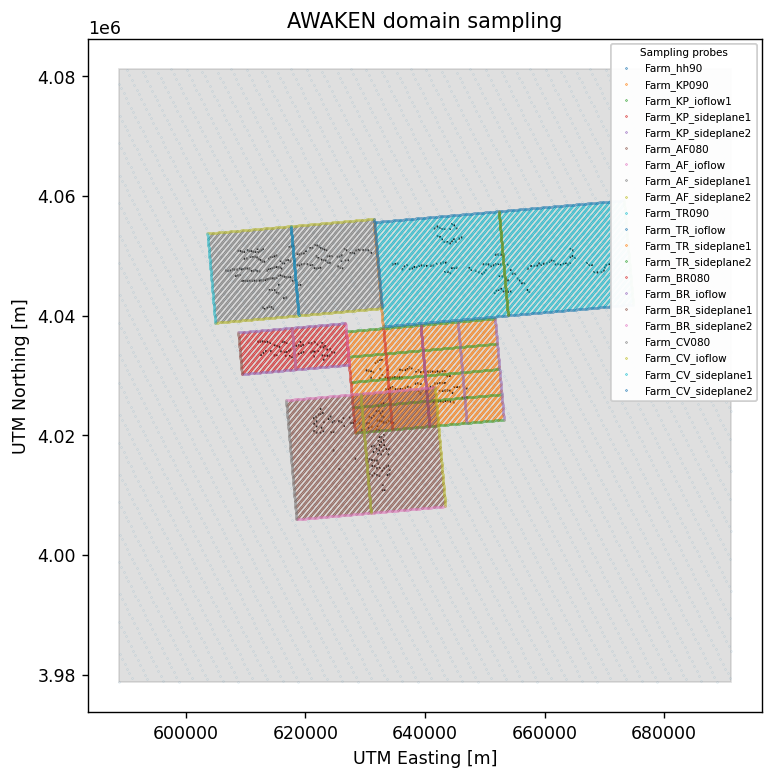

In [10]:
# Plot the domain
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':0.1, 'marker':'.', 'linestyle':'None', }"
case.popup_storteddata['plotdomain']['plot_sampleprobes_legend'] = "{'title':'Sampling probes', 'fontsize':6, 'loc':'upper right', 'markerscale':6}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = plotplanes #Farmplanes 
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] 
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
start = time.time()
case.plotDomain(ax=ax, verbose=False, plotskip=50)

ax.set_xlabel('UTM Easting [m]')
ax.set_ylabel('UTM Northing [m]')
ax.set_title('AWAKEN domain sampling')

Text(0.5, 1.0, 'King Plains sampling planes')

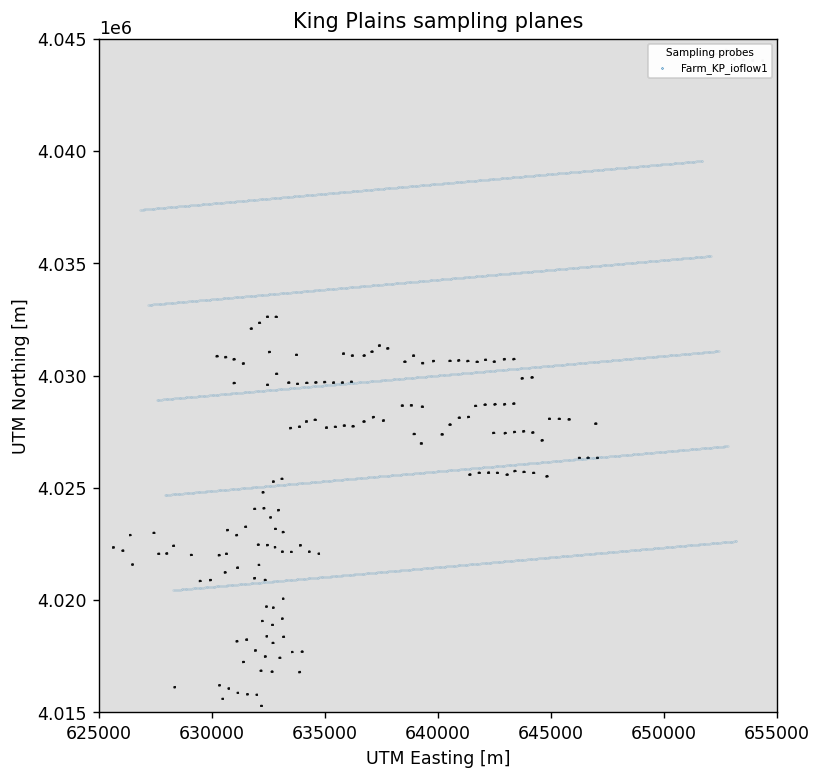

In [18]:
# Plot the domain
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':0.1, 'marker':'.', 'linestyle':'None', }"
case.popup_storteddata['plotdomain']['plot_sampleprobes_legend'] = "{'title':'Sampling probes', 'fontsize':6, 'loc':'upper right', 'markerscale':6}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = ['Farm_KP_ioflow1']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] 
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
start = time.time()
case.plotDomain(ax=ax, verbose=False, plotskip=50)

ax.set_aspect('auto')
ax.set_xlim([ 625000,  655000])
ax.set_ylim([4015000, 4045000])

ax.set_xlabel('UTM Easting [m]')
ax.set_ylabel('UTM Northing [m]')
ax.set_title('King Plains sampling planes')

Text(0.5, 1.0, 'King Plains sampling planes')

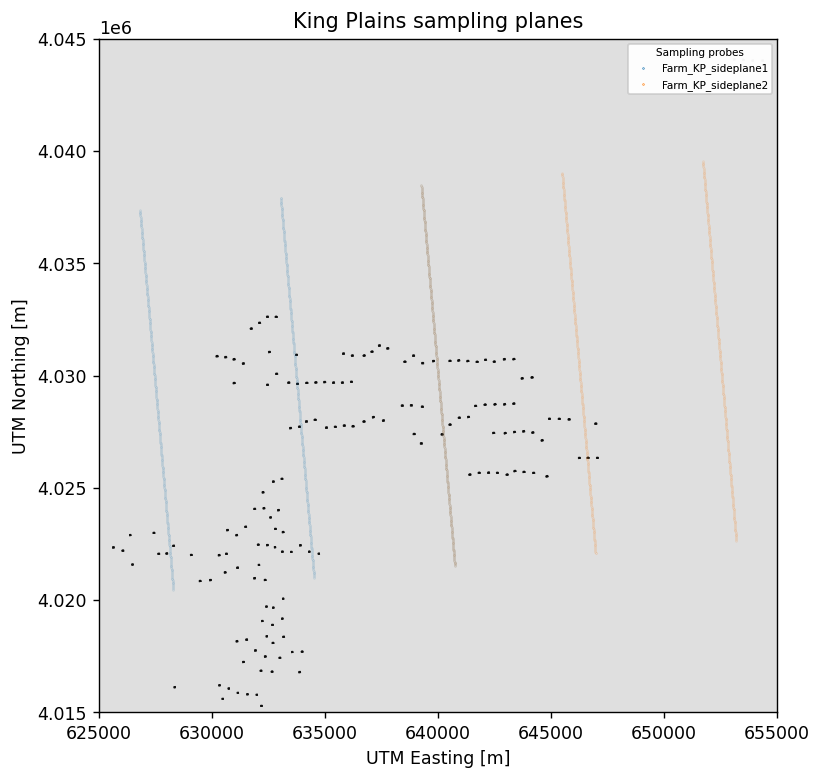

In [19]:
# Plot the domain
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':0.1, 'marker':'.', 'linestyle':'None', }"
case.popup_storteddata['plotdomain']['plot_sampleprobes_legend'] = "{'title':'Sampling probes', 'fontsize':6, 'loc':'upper right', 'markerscale':6}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = ['Farm_KP_sideplane1', 'Farm_KP_sideplane2']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] 
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
start = time.time()
case.plotDomain(ax=ax, verbose=False, plotskip=50)

ax.set_aspect('auto')
ax.set_xlim([ 625000,  655000])
ax.set_ylim([4015000, 4045000])

ax.set_xlabel('UTM Easting [m]')
ax.set_ylabel('UTM Northing [m]')
ax.set_title('King Plains sampling planes')

Time: 54.54324245452881


Text(0, 0.5, 'UTM Northing [m]')

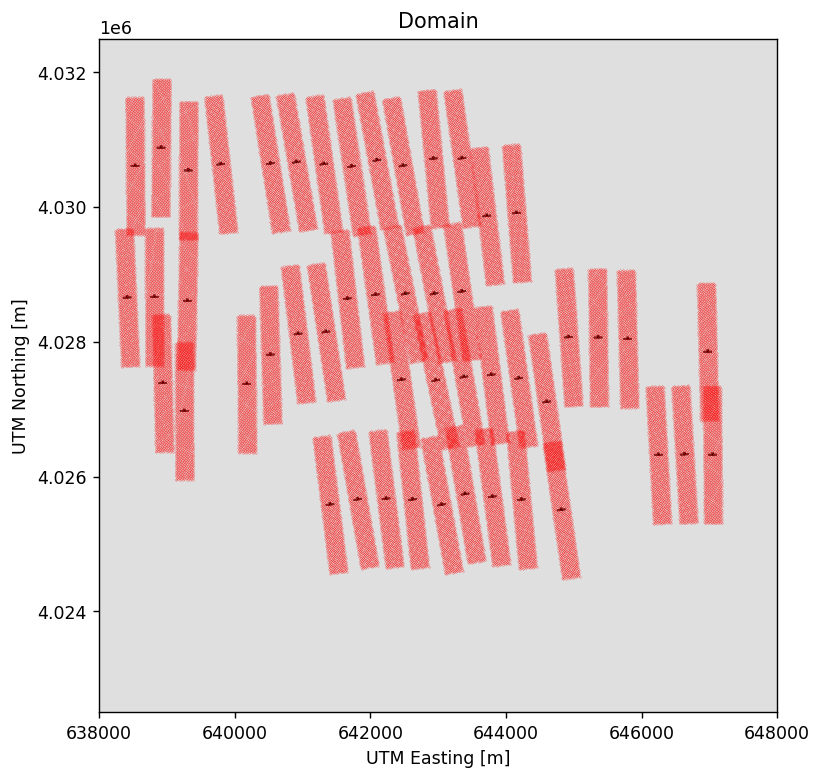

In [11]:
# Plot the domain
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':0.25, 'marker':'.', 'linestyle':'None', 'mfc':'r', 'markeredgecolor':'r'}"
case.popup_storteddata['plotdomain']['plot_sampleprobes_legend'] = "{}" #"{'title':'Sampling probes', 'fontsize':6, 'loc':'upper right', 'markerscale':6}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = KPturbhh #['p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'#'YZ' 
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] #case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
start = time.time()
case.plotDomain(ax=ax, verbose=False, plotskip=5)
end = time.time()
print("Time: "+repr(end - start))

"""
case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':0.1, 'marker':'.', 'linestyle':'None', 'mfc':'g', 'markeredgecolor':'g'}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = KProtor #['p_hub']
start = time.time()
case.plotDomain(ax=ax, verbose=False)
end = time.time()
print("Time: "+repr(end - start))

case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':0.1, 'marker':'.', 'linestyle':'None', 'mfc':'b', 'markeredgecolor':'b'}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = KPsw #['p_hub']
start = time.time()
case.plotDomain(ax=ax, verbose=False)
end = time.time()
print("Time: "+repr(end - start))
"""
ax.set_aspect('auto')
ax.set_xlim([638000,  648000])
ax.set_ylim([4022500, 4032500])
ax.set_xlabel('UTM Easting [m]')
ax.set_ylabel('UTM Northing [m]')

Time: 55.017224073410034
Time: 54.37833380699158


(4022500.0, 4032500.0)

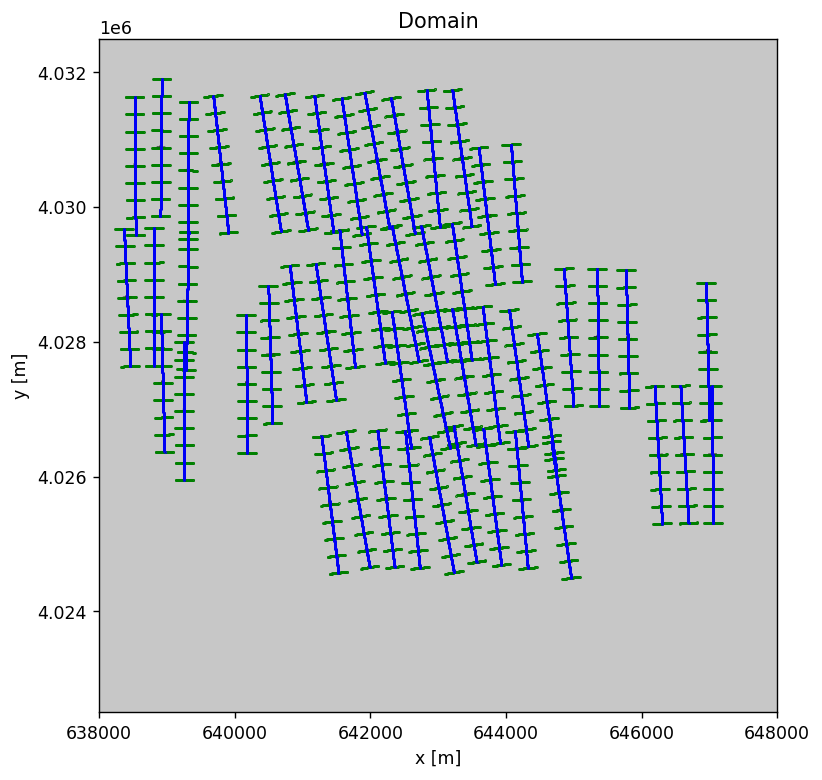

In [12]:
# Plot the domain
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':0.25, 'marker':'.', 'linestyle':'None', 'mfc':'r', 'markeredgecolor':'r'}"
case.popup_storteddata['plotdomain']['plot_sampleprobes_legend'] = "{}" #"{'title':'Sampling probes', 'fontsize':6, 'loc':'upper right', 'markerscale':6}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = KPturbhh #['p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'#'YZ' 
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] #case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False

"""
start = time.time()
case.plotDomain(ax=ax, verbose=False, plotskip=5)
end = time.time()
print("Time: "+repr(end - start))
"""

case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':0.1, 'marker':'.', 'linestyle':'None', 'mfc':'g', 'markeredgecolor':'g'}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = KProtor #['p_hub']
start = time.time()
case.plotDomain(ax=ax, verbose=False)
end = time.time()
print("Time: "+repr(end - start))

case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':0.1, 'marker':'.', 'linestyle':'None', 'mfc':'b', 'markeredgecolor':'b'}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = KPsw #['p_hub']
start = time.time()
case.plotDomain(ax=ax, verbose=False)
end = time.time()
print("Time: "+repr(end - start))

ax.set_aspect('auto')
ax.set_xlim([638000,  648000])
ax.set_ylim([4022500, 4032500])

Time: 50.2952995300293


(4020000.0, 4045000.0)

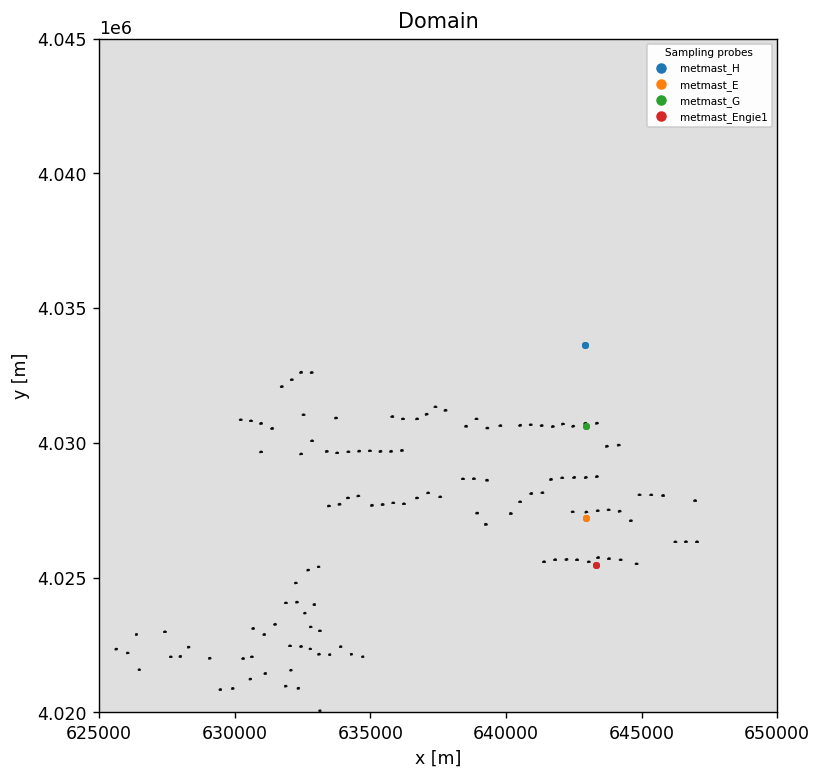

In [13]:
# Plot the domain
fig, ax = plt.subplots(figsize=(7,7), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_sampleprobes_style']  = "{'markersize':5, 'marker':'.', 'linestyle':'None', }"
case.popup_storteddata['plotdomain']['plot_sampleprobes_legend'] = "{'title':'Sampling probes', 'fontsize':6, 'loc':'upper right', 'markerscale':2}"
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = metmast 
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.popup_storteddata['plotdomain']['plot_refineboxes']     = [] #case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False

start = time.time()
case.plotDomain(ax=ax, verbose=False)
end = time.time()
print("Time: "+repr(end - start))

ax.set_aspect('auto')
ax.set_xlim([625000,  650000])
ax.set_ylim([4020000, 4045000])